In [1]:
import numpy as np
import pandas as pd

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

%matplotlib inline

# Изучение данных



In [2]:
def unique_values(f):
    for c in f.columns:
        un = f[c].unique()
        print("{} ({} unique)\n{}\n".format(c, len(un), un))

In [3]:
def churn_plot(f, c):
    plt.figure(figsize=(8, 5))
    plt.hist(f[f.Churn == 'Yes'][c], alpha=0.6, label='Churn=Yes')
    plt.hist(f[f.Churn == 'No'][c], alpha=0.6, label='Churn=No')
    plt.xlabel(c)
    plt.legend()
    plt.show()

In [4]:
df = pd.read_csv('TelcoCustomerChurn.csv')

## Первый взгляд

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop(columns='customerID', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
unique_values(df)

gender (2 unique)
['Female' 'Male']

SeniorCitizen (2 unique)
[0 1]

Partner (2 unique)
['Yes' 'No']

Dependents (2 unique)
['No' 'Yes']

tenure (73 unique)
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService (2 unique)
['No' 'Yes']

MultipleLines (3 unique)
['No phone service' 'No' 'Yes']

InternetService (3 unique)
['DSL' 'Fiber optic' 'No']

OnlineSecurity (3 unique)
['No' 'Yes' 'No internet service']

OnlineBackup (3 unique)
['Yes' 'No' 'No internet service']

DeviceProtection (3 unique)
['No' 'Yes' 'No internet service']

TechSupport (3 unique)
['No' 'Yes' 'No internet service']

StreamingTV (3 unique)
['No' 'Yes' 'No internet service']

StreamingMovies (3 unique)
['No' 'Yes' 'No internet service']

Contract (3 unique)
['Month-to-month' 'One year' 'Two year']

PaperlessBilling (2 unique)
['Yes' 'No

## Обработка

### TotalCharges

In [9]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
df.TotalCharges = df.TotalCharges.replace(' ', np.nan, regex=False).astype(float)
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

### Numeric

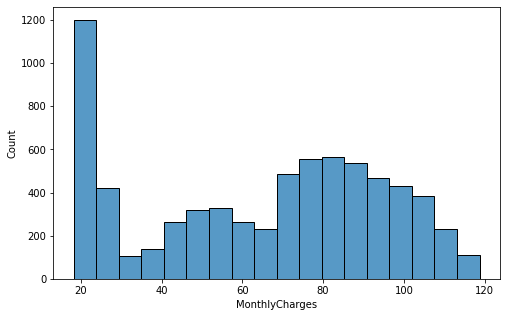

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df.MonthlyCharges)

У большего количества пользователей ежемесячная плата очень мала

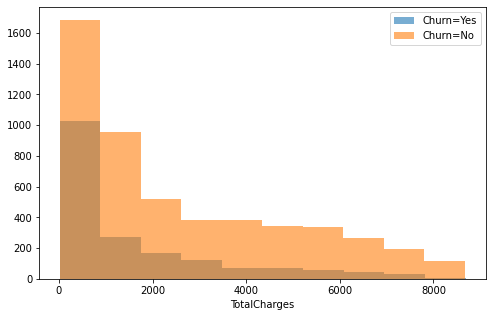

In [12]:
churn_plot(df, 'TotalCharges')

Пользователи с низкими общими расходами уходили чаще

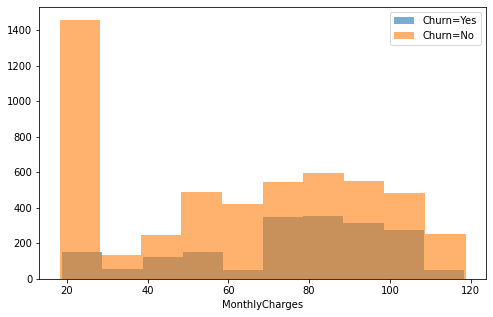

In [13]:
churn_plot(df, 'MonthlyCharges')

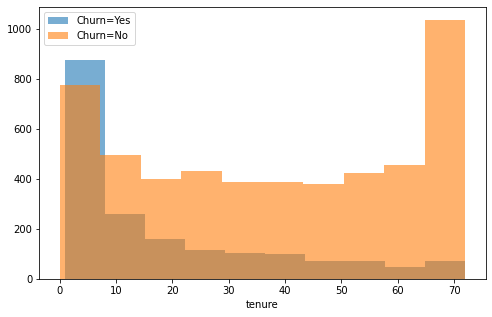

In [14]:
churn_plot(df, 'tenure')

Пользователи до 8 лет ипользования чаще уходят

In [15]:
numeric_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges'
]

In [16]:
df_nums = pd.DataFrame(StandardScaler().fit_transform(df[numeric_cols]), columns=numeric_cols)

In [17]:
df[numeric_cols] = df_nums[numeric_cols]

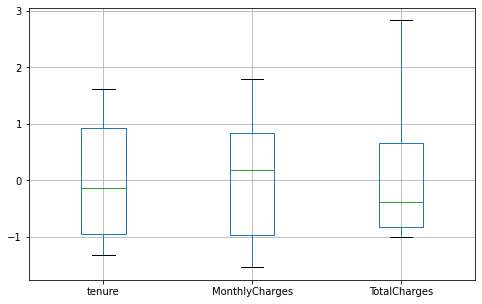

In [18]:
plt.figure(figsize=(8, 5))
df.boxplot(column=numeric_cols)
plt.show()

Выбросов нет

### OneHot

In [19]:
onehot_cols = [
    'InternetService', 'PaymentMethod', 'Contract', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

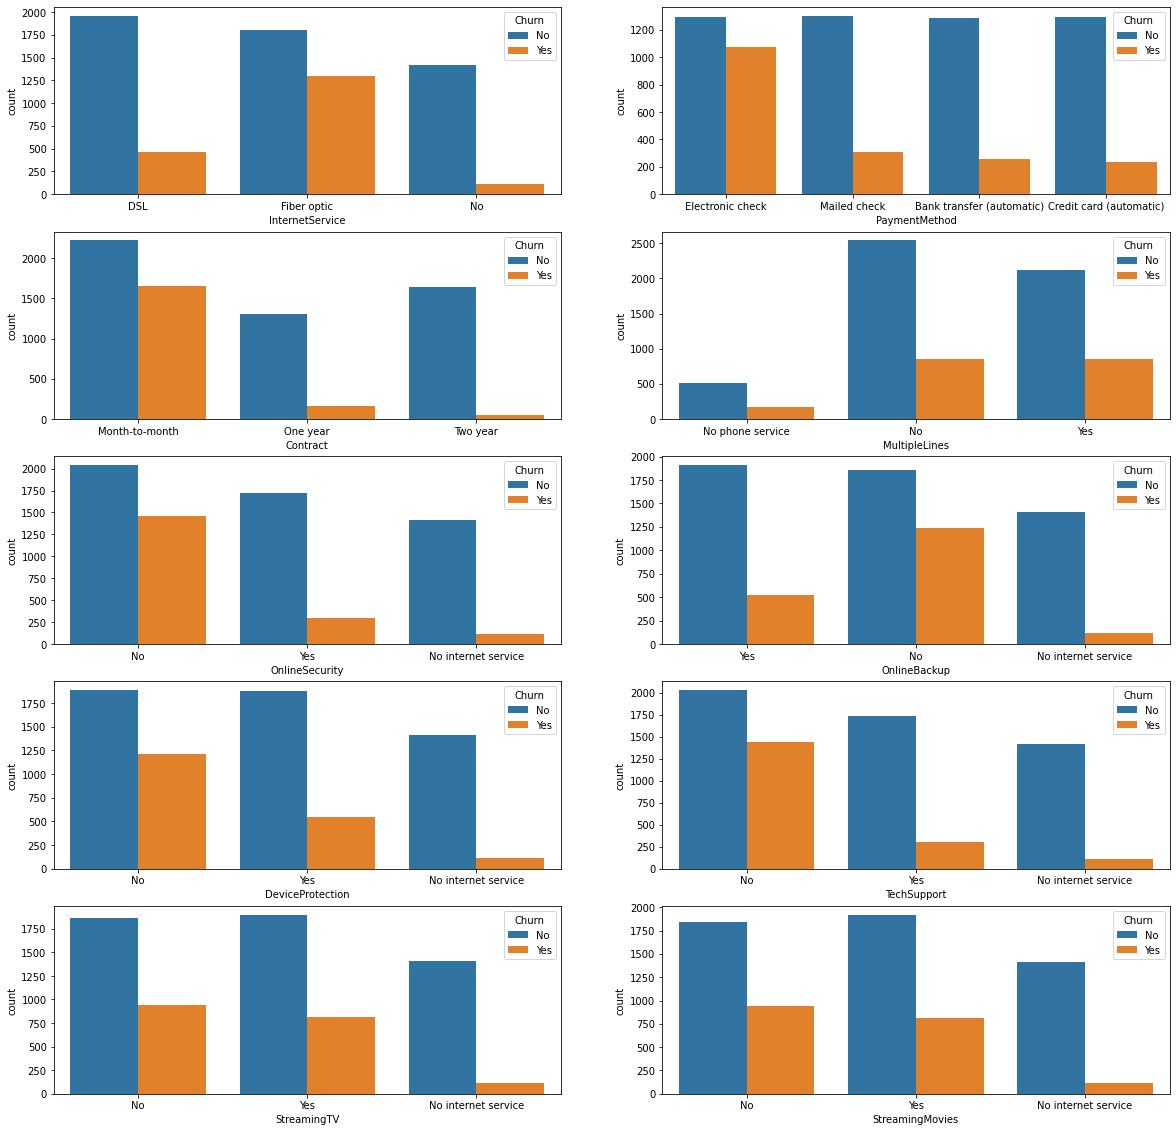

In [20]:
plt.figure(figsize = (20, 20))
pl_count = len(onehot_cols)
pl_rows = np.ceil(pl_count / 2)
pl_cols = np.ceil(pl_count / pl_rows)
for i in range(pl_count):
    plt.subplot(pl_rows, pl_cols, i+1)
    sns.countplot(x=onehot_cols[i], data=df, hue='Churn')
plt.show()

Уходили чаще пользователи:
- с оптоволоконным интернетом
- c электронными чеками
- с месячными контрактами
- без онлайн защиты 
- без онлайн резервных копий
- без защиты устройств
- без техподдержки
- без стриминтовых услуг

In [21]:
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,Yes,No,-1.277445,No,Yes,-1.160323,-0.994971,No,...,0,1,0,0,0,0,0,0,0,0
1,Male,0,No,No,0.066327,Yes,No,-0.259629,-0.173876,No,...,0,0,0,1,0,0,0,0,0,0
2,Male,0,No,No,-1.236724,Yes,Yes,-0.362660,-0.960399,Yes,...,0,1,0,0,0,0,0,0,0,0
3,Male,0,No,No,0.514251,No,No,-0.746535,-0.195400,No,...,0,0,0,1,0,1,0,0,0,0
4,Female,0,No,No,-1.236724,Yes,Yes,0.197365,-0.941193,Yes,...,0,0,0,0,0,0,0,0,0,0


### Ordinals

In [23]:
ordinal_cols = [ 
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

In [24]:
df[ordinal_cols] = OrdinalEncoder().fit_transform(df[ordinal_cols].values)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,0.0,1.0,0.0,-1.277445,0.0,1.0,-1.160323,-0.994971,0.0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.066327,1.0,0.0,-0.259629,-0.173876,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,-1.236724,1.0,1.0,-0.362660,-0.960399,1.0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.514251,0.0,0.0,-0.746535,-0.195400,0.0,...,0,0,0,1,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,-1.236724,1.0,1.0,0.197365,-0.941193,1.0,...,0,0,0,0,0,0,0,0,0,0


## Churn Correlation

In [26]:
churn_corr = df.corr()[['Churn']].sort_values('Churn', ascending=False)[1:]

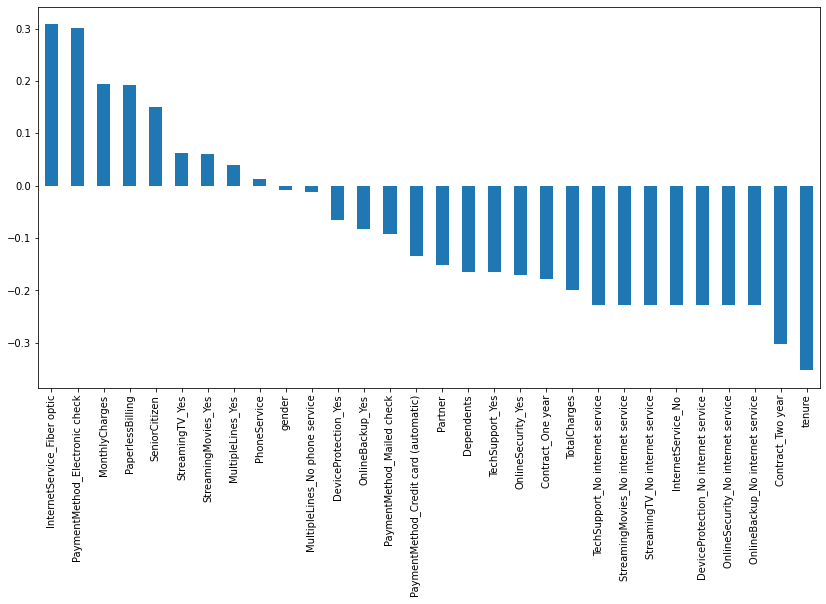

In [27]:
fig, ax = plt.subplots(figsize=(14, 7))
churn_corr.plot(kind='bar', ax=ax, legend=False)
plt.show()

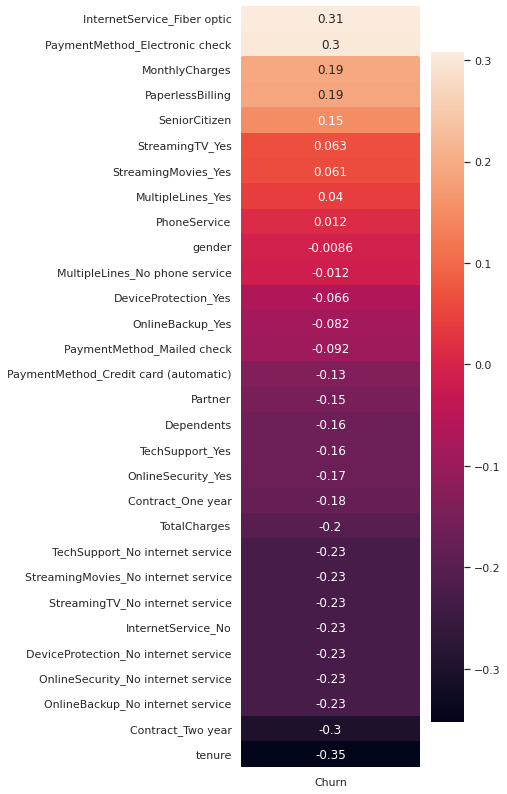

In [28]:
plt.figure(figsize=(4, 14))
sns.set(font_scale=1)
sns.heatmap(churn_corr, annot=True)
plt.show()

# Пайплайны

In [29]:
ordinal_cols.remove('Churn')

In [30]:
def fill_empty(X):
    for col in X.columns:
        X.loc[X[col] == ' ', col] = np.nan
        pd.to_numeric(X[col])
    return X

In [31]:
numeric_pipeline = Pipeline([
    ('empty',   FunctionTransformer(fill_empty)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',  StandardScaler()),
])

In [32]:
preprocessor = ColumnTransformer([
    ('numeric',  numeric_pipeline,  numeric_cols),
    ('ordinal',  OrdinalEncoder(), ordinal_cols),
    ('onehot',   OneHotEncoder(),   onehot_cols),
])

# Предсказания

In [33]:
df_ = pd.read_csv('TelcoCustomerChurn.csv')
df_.drop(columns='customerID', inplace=True)

In [34]:
X = df_.drop(columns='Churn')
y = df_.Churn

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [36]:
def run_prediction(models, X_train, y_train, X_test, y_test):
    for model in models:
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model',        model[1])
        ])
        pipe.fit(X_train, y_train)
        y_pred, y_pred_train = pipe.predict(X_test), pipe.predict(X_train)
        print('Accuracy of {}\n test : {}\ntrain : {}\n'.format(model[0], accuracy_score(y_pred, y_test), accuracy_score(y_pred_train, y_train)))

In [37]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest',       RandomForestClassifier(n_estimators=100, max_features=0.2, max_samples=0.1, random_state=42)),
    ('Gradient Boosting',   GradientBoostingClassifier(learning_rate=0.05, random_state=42)),
]

In [38]:
run_prediction(models, X_train, y_train, X_test, y_test)

Accuracy of Logistic Regression
 test : 0.8158268275372604
train : 0.7976331360946746

Accuracy of Random Forest
 test : 0.8151171043293116
train : 0.8274556213017752

Accuracy of Gradient Boosting
 test : 0.8112136266855926
train : 0.8127810650887574

